# W4P2

#### Team 6: Alice Friedman, Jun Pan, Stephen (Scott) Jones, and Jeff Littlejohn 

### 1. Choose a corpus of interest.

We chose the Reuters corpus available as part of the `nltk` package.

In [589]:
import nltk
import nltk.corpus

In [590]:
from nltk.corpus import reuters

In [591]:
reuters.words()

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

In [614]:
textlist = reuters.words()

#convert list to lowercase
textlist = [w.lower() for w in textlist if w.isalpha()]

#check length of list
len(textlist)

1327141

In [593]:
sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['a', 'aa', 'aaa', 'aabex', 'aac', 'aachener', 'aagiy', 'aaica', 'aaix', 'aam']

In [594]:
#check number of unique words before cleaning
len(sorted_text_set)

29173

In [595]:
import string
textlist = [''.join(c for c in s if c not in string.punctuation) for s in textlist]
textlist = [s for s in text_words if s]

sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['0', '00', '000', '0000', '00000', '0009', '001', '002', '003', '0037']

In [596]:
#no_integers = [x for x in text_words if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    
textlist = [x.lower() for x in textlist if not any(c.isdigit() for c in x)]

sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['a', 'aa', 'aaa', 'aabex', 'aac', 'aachener', 'aagiy', 'aaica', 'aaix', 'aam']

In [599]:
sorted_text_set[29160:]

['zubedei',
 'zubeidi',
 'zuccherifici',
 'zuckerman',
 'zuheir',
 'zulia',
 'zurich',
 'zuyuan',
 'zverev',
 'zwermann',
 'zy',
 'zzzz',
 'üside']

In [600]:
#remove all single-letter  and two-letter "words"
textlist = [x for x in textlist if (len(x) > 2)]

sorted_text_set = sorted(set(textlist))

sorted_text_set[:10]

['aaa',
 'aabex',
 'aac',
 'aachener',
 'aagiy',
 'aaica',
 'aaix',
 'aam',
 'aame',
 'aancor']

In [601]:
#remove all words without at least one vowel
vowel = ['a','e','i','o','u'] 

vowset = set(vowel)
textlist = [word for word in textlist if vowset.intersection(word)]

textlist[:10]

['asian',
 'exporters',
 'fear',
 'damage',
 'from',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction']

In [613]:
from nltk.corpus import stopwords

#remove stopwords, save to another textlist for comparison later in the Zipf distribution plot
stopwords = stopwords.words('english')
textlist2 = [w for w in textlist if w not in stopwords]

sorted_text_set2 = sorted(set(textlist2))

sorted_text_set2[200:210]

['accurate',
 'accurately',
 'accuray',
 'accured',
 'accusation',
 'accusations',
 'accuse',
 'accused',
 'accusing',
 'accustomed']

### 2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).

After removing strings containing integers, limiting the lenth of strings to greater than 2, and removing stopwords in the list, we calculate the number of distinct "words"; the `set` commands omits duplicates from the number.

In [597]:
len(sorted_text_set)

29173

There are 39,685 distinct "words" left in the corpus.

After removing strings containing integers and numbers in the list, we calculate the number of total words left in the list, including duplicates.

In [598]:
len(textlist)

1327141

There are 1,327,141 "words" in the list.

In [603]:
fdist = nltk.FreqDist(textlist2)    
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Word'
df_fdist.sort_values(['Frequency'], ascending=[False], inplace = True)

#add index number, make word a column
df_fdist.reset_index(level=0, inplace=True)

#print first ten of data frame
df_fdist.head(10)

,Word,Frequency
0,said,25383
1,year,7529
2,net,6989
3,billion,5829
4,loss,5124
5,would,4673
6,company,4670
7,inc,4121
8,bank,3654
9,corp,3399


### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [604]:
half_numwords = len(textlist2)
half_numwords

761405

In [605]:
df_fdist['Sum'] = df_fdist.Frequency.cumsum()

unique_arehalf = df_fdist[df_fdist['Frequency']<=half_numwords]

unique_arehalf.tail(1).Sum

27109    761405
Name: Sum, dtype: int64

Since the index for the dataframe begins at 0, there are 27,110 unique words that represent approximately half of the 761,405 total words in the corpus.

### 4. Identify the 200 highest frequency words in this corpus.

The code below creates a subset of the data with the 200 most frequently-occurring words; a word cloud is created.

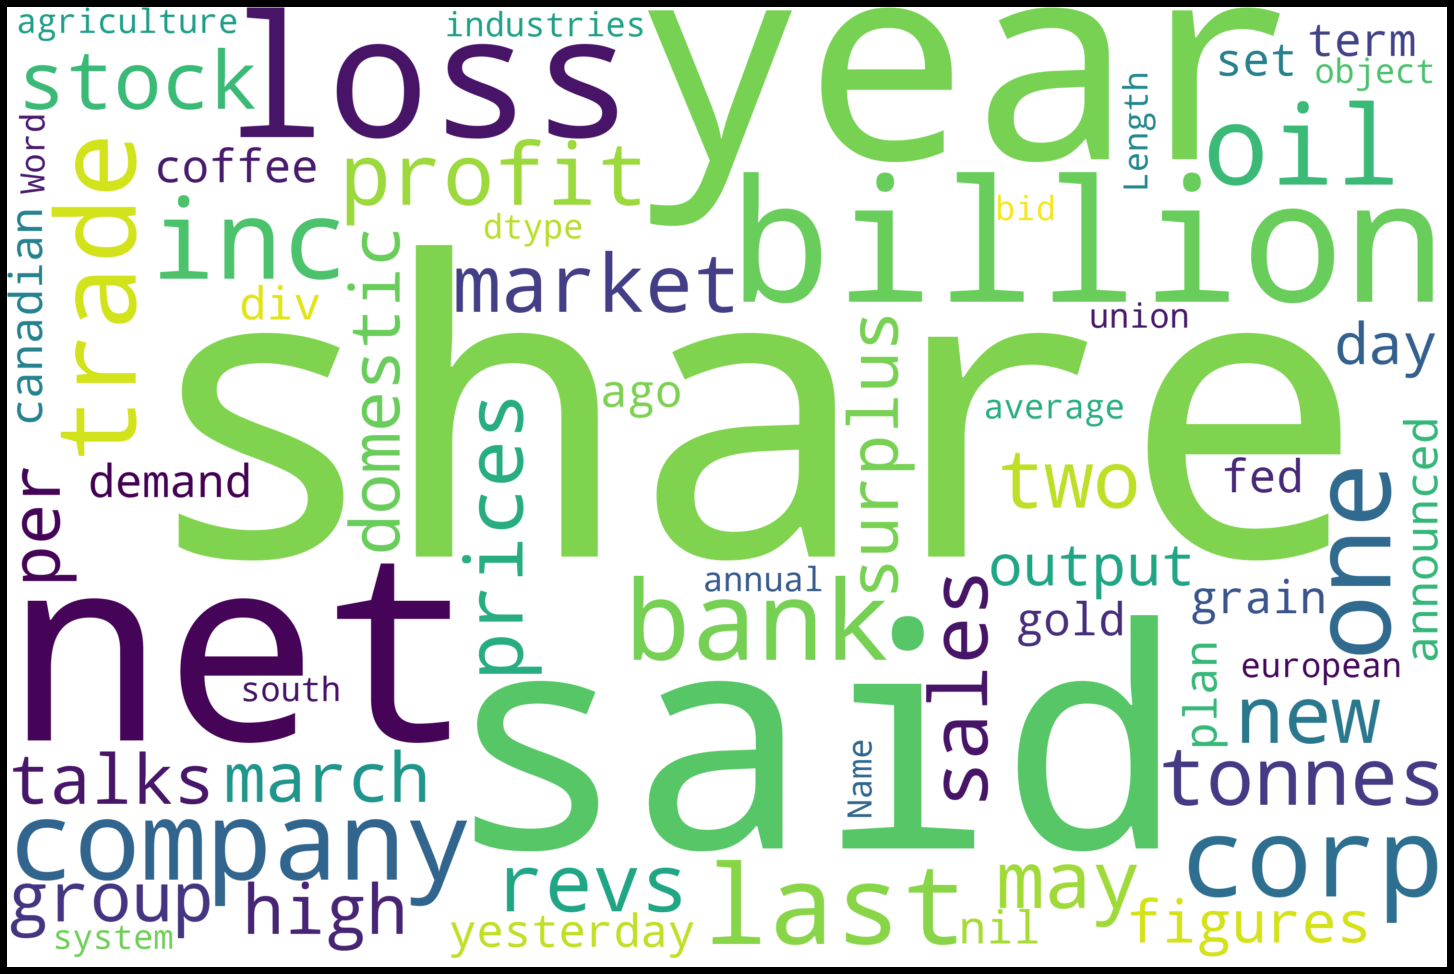

In [606]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

high200freq = df_fdist[df_fdist.index<=199]

text = high200freq.Word
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate(str(text))
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [607]:
high200freq.head(10)

,Word,Frequency,Sum
0,said,25383,25383
1,year,7529,32912
2,net,6989,39901
3,billion,5829,45730
4,loss,5124,50854
5,would,4673,55527
6,company,4670,60197
7,inc,4121,64318
8,bank,3654,67972
9,corp,3399,71371


### 5. Create a graph that shows the relative frequency of these 200 words.

A bar chart plots word frequency.

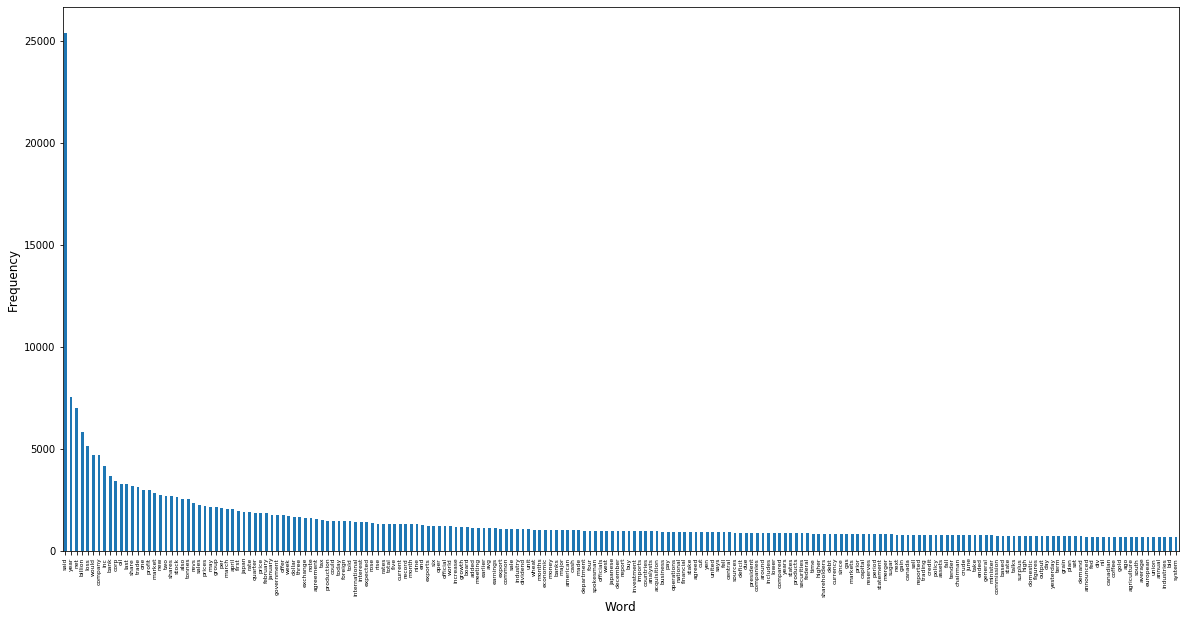

In [608]:
high200freq = high200freq.set_index('Word')

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
high200freq.Frequency.plot.bar()
plt.xticks(rotation=90, size=6)
plt.xlabel("Word",size=12)
plt.ylabel("Frequency",size=12)
plt.show()

### 6. Does the observed relative frequency of these words follow Zipf’s law?  Explain.

Compare the word frequency data to the Zipf distribution.

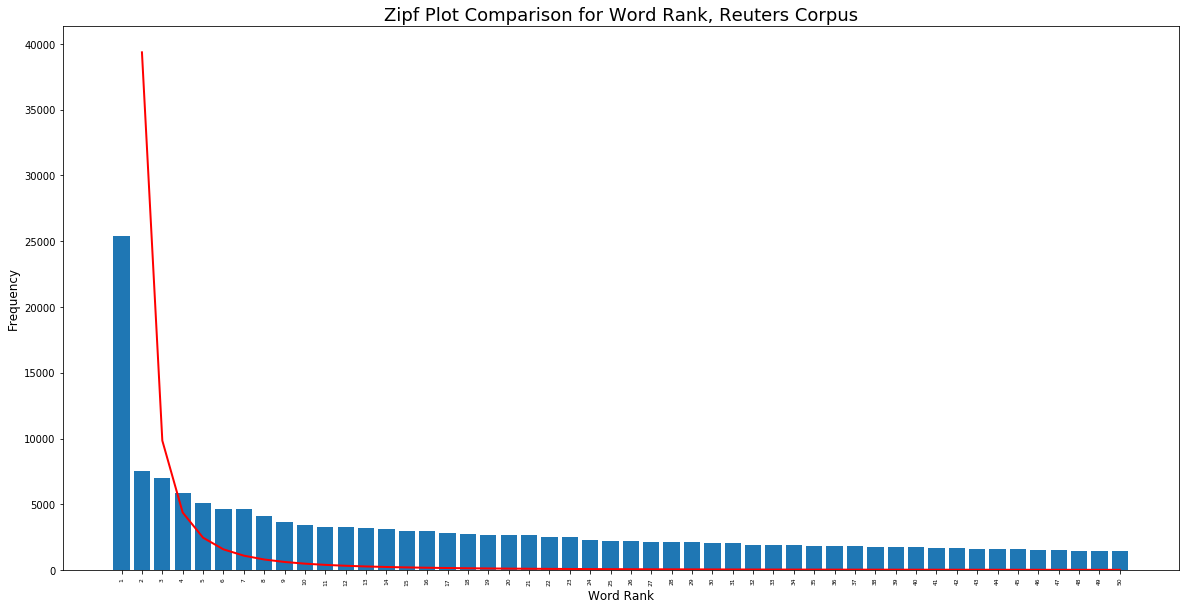

In [609]:
import matplotlib.pyplot as plt
from scipy import special

a = 2. # parameter
s = np.random.zipf(a, 1000)

high200freq = df_fdist[df_fdist.index<=49]

high200freq.index+=1

#make the figure larger
fig = plt.figure(figsize=(20,10))

#Plot bar with values from dict and label with keys
plt.bar(range(len(high200freq)), high200freq.Frequency, align='center')
plt.xticks(range(len(high200freq)), high200freq.index)

#Rotate labels by 90 degrees so you can see them
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#plot zipf distribution
count, bins, ignored = plt.hist(s[s<50], 50, density=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y*max(high200freq.Frequency), linewidth=2, color='r')

plt.title("Zipf Plot Comparison for Word Rank, Reuters Corpus",size=18)
plt.xlabel("Word Rank",size=12)
plt.ylabel("Frequency",size=12)

plt.show()

We'll leave stopwords in and compare to Zipf distribution again.

In [610]:
fdist = nltk.FreqDist(textlist)    
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Word'
df_fdist.sort_values(['Frequency'], ascending=[False], inplace = True)

#add index number, make word a column
df_fdist.reset_index(level=0, inplace=True)

#print first ten of data frame
df_fdist.head(10)

,Word,Frequency
0,the,69277
1,and,25648
2,said,25383
3,for,13782
4,from,8217
5,that,7540
6,year,7529
7,its,7402
8,net,6989
9,with,6179


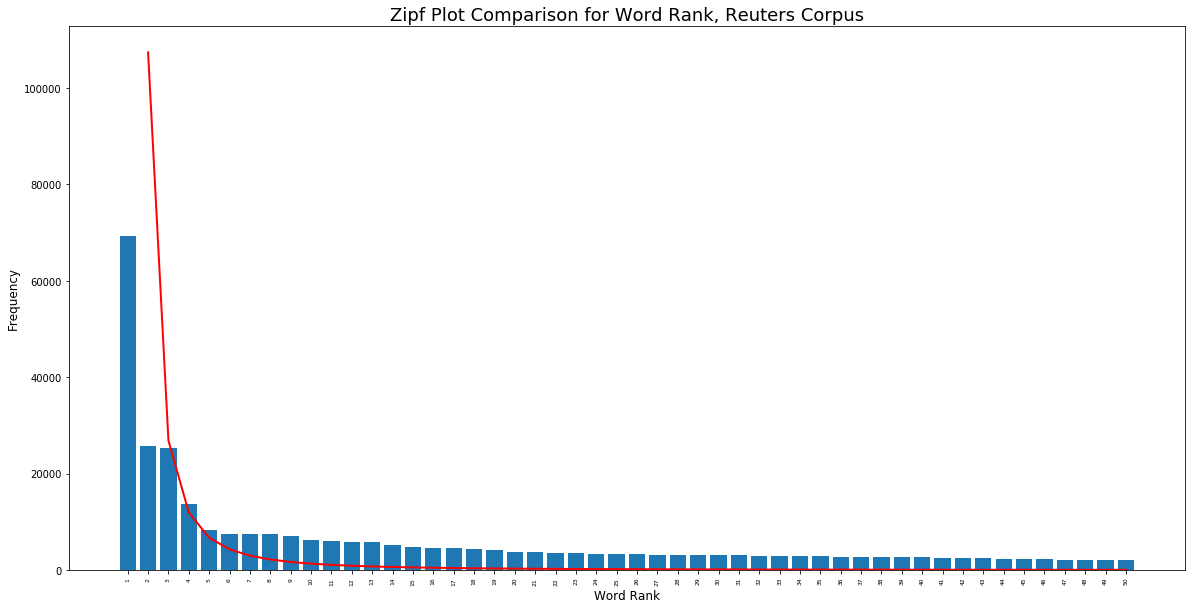

In [611]:
high200freq = df_fdist[df_fdist.index<=49]

high200freq.index+=1

#make the figure larger
fig = plt.figure(figsize=(20,10))

#Plot bar with values from dict and label with keys
plt.bar(range(len(high200freq)), high200freq.Frequency, align='center')
plt.xticks(range(len(high200freq)), high200freq.index)

#Rotate labels by 90 degrees so you can see them
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

#plot zipf distribution
count, bins, ignored = plt.hist(s[s<50], 50, density=True)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)
plt.plot(x, y*max(high200freq.Frequency), linewidth=2, color='r')

plt.title("Zipf Plot Comparison for Word Rank, Reuters Corpus",size=18)
plt.xlabel("Word Rank",size=12)
plt.ylabel("Frequency",size=12)

plt.show()

The distribution of inique words approximately follow the Zipf distribution, though cleaning provides an obstacle to a perfect fit. Small words, such as "an", "to", etc. were removed in our cleaning; as they were the most frequent words in the corpus, their removal impacts frequency distribution. The plots above illustrate the difference. Additionally, the specific subject matter of the corpora will obviously vary.